In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [6]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
df = df.drop(columns=['Cabin'])

In [8]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

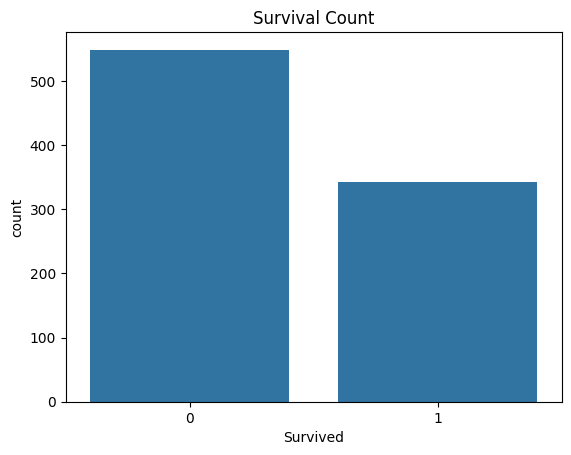

In [9]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

Observation:
More passengers did not survive (0) compared to those who survived (1). 
The dataset is imbalanced with more non-survivors.

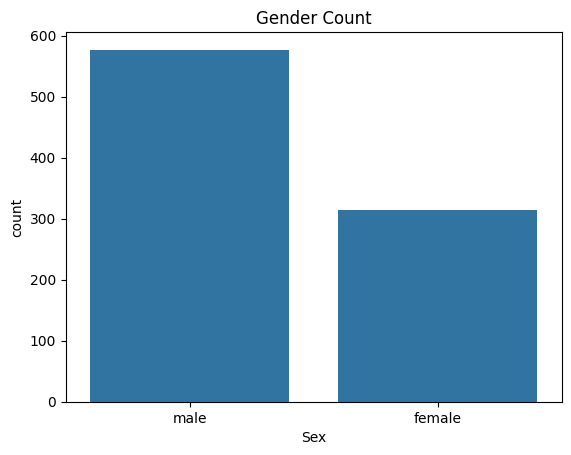

In [10]:
sns.countplot(x='Sex', data=df)
plt.title("Gender Count")
plt.show()

Observation:
There were more male passengers than female passengers. 
However, males had lower survival compared to females.


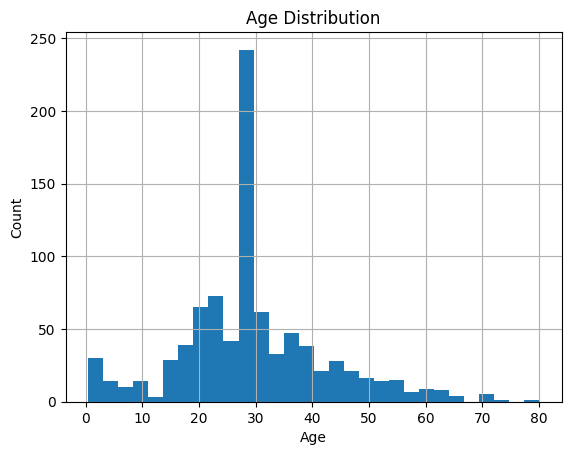

In [11]:
df['Age'].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Observation:
Most passengers were between 20-40 years of age.
Age distribution is slightly right skewed.


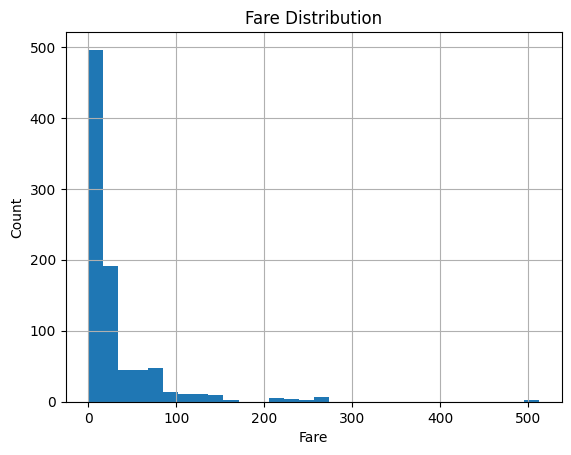

In [12]:
df['Fare'].hist(bins=30)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

Observation:
Most passengers paid lower fares. 
A few passengers paid very high fares (outliers).


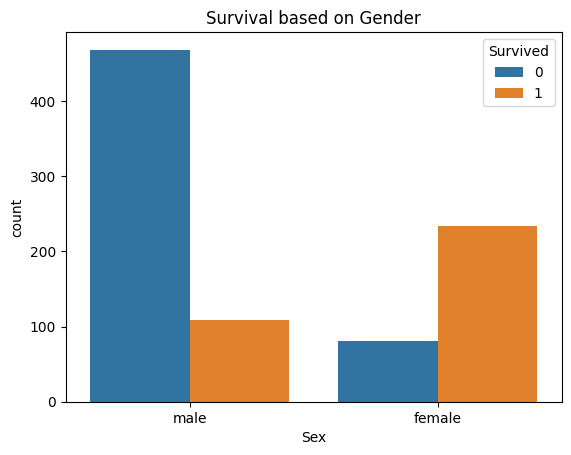

In [13]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival based on Gender")
plt.show()

Observation:
Female passengers had a much higher survival rate than male passengers.
Most males did not survive, while a large number of females survived.
This shows that gender was a very important factor in survival on the Titanic.


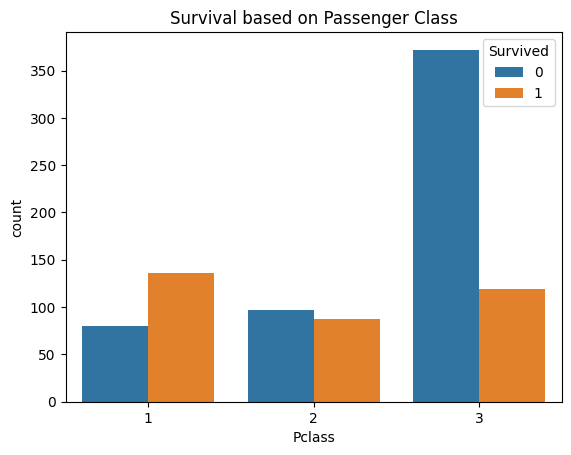

In [14]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival based on Passenger Class")
plt.show()

Observation:
1st class passengers had the highest survival rate.
2nd class passengers had moderate survival.
3rd class passengers had the lowest survival rate.
This shows that passengers with higher ticket class (wealthier passengers) had better access to lifeboats and therefore higher chances of survival.


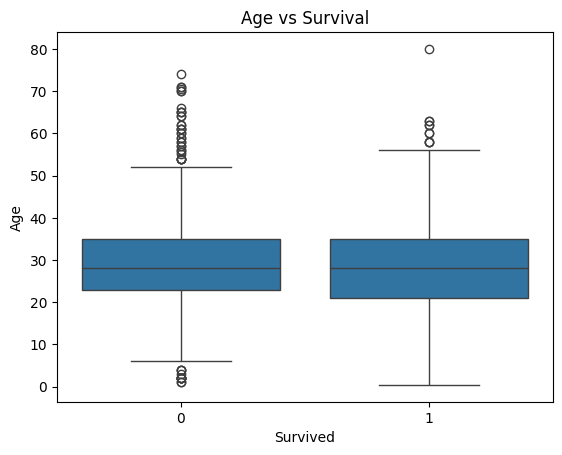

In [15]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

Observation:
The average age of survivors is slightly lower compared to non-survivors.
Many children (younger passengers) survived, which suggests that younger passengers had a better chance of survival.
Overall, there is no very strong difference in age distribution, but younger age groups show higher survival.


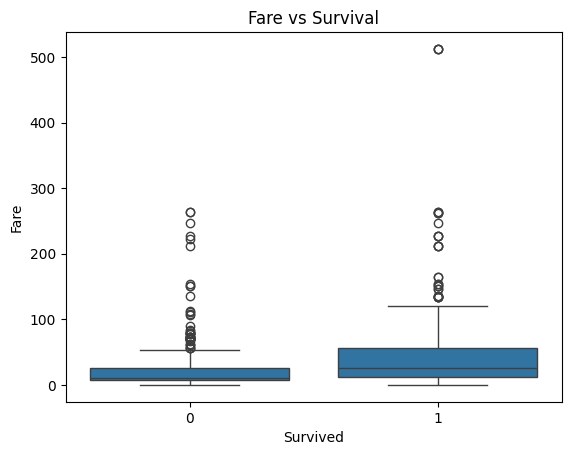

In [16]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()

Observation:
Passengers who survived generally paid higher fares.
This means people with expensive tickets (wealthier passengers) had better survival chances.
Higher fare values show a clear pattern of increased survival, while passengers with very low fares mostly did not survive.


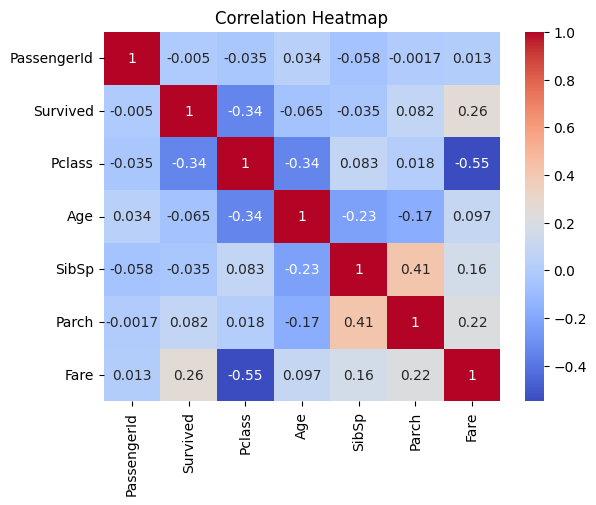

In [17]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Observation:
Survived shows a positive correlation with Fare, indicating that passengers who paid higher ticket prices had higher chances of survival.
Survived has a negative correlation with Pclass, meaning passengers from lower classes (especially 3rd class) had lower survival chances.
Other numerical features such as PassengerId, SibSp, and Parch show weak or no strong correlation with survival.
Overall, Fare and Pclass are the most significant numerical features related to survival.


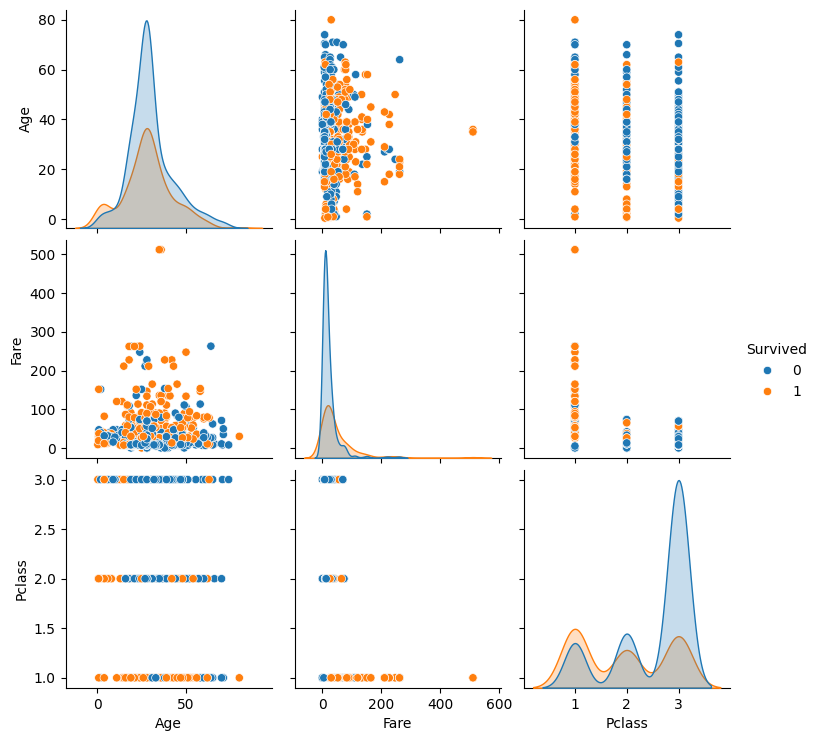

In [18]:
sns.pairplot(df[['Age','Fare','Pclass','Survived']], hue='Survived')
plt.show()

Observation:
The pairplot shows clear separation between survivors and non-survivors in terms of Fare and Pclass.
Passengers with higher fares and lower Pclass (1st class) are more likely to survive.
Age does not show a very strong separation, but younger passengers include more survivors.
Overall, Fare and Pclass visually appear to be the strongest predictors of survival in the dataset.


## Final Summary / Insights
After Performing Exploratory Data Analysis (EDA) on the Titanic dataset, the following conclusions were observed:

### 🔹 1. Gender and Survival
- Females had a much higher survival rate than males.
- This was the strongest relationship in the dataset.

### 🔹 2. Passenger Class and Survival
- first class passengers survived the most.
- third class passengers had the lowest survival rate.

### 🔹 3. Age Distribution
- Most passengers were between 20-40 years.
- Younger passengers (children) had slightly higher chances of survival.

### 🔹 4. Fare and Survival
- Higher Fare -> Higher survival.
- Indicates wealthy passengers had better access to lifeboats.

### 🔹 5. Missing Values Handling
- Age was filled with median (177 missing values).
- Embarked filled with mode (2 missing values).
- Cabin column dropped due to heavy missing values (687 missing).

### 🔹 6. Correlation Insights
- Survived has a positive correlation with Fare.
- Survived has a negative correlation with Pclass.
- Numeric features correlate logically with survival.

### Overall Conclusion
Women, children, and wealthy passengers had significantly higher survival chances on the Titanic.